In [1]:
import numpy as np

from network import Linear, ReLu, SoftMax, Model, Optimizer, MSE, CrossEntropy

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

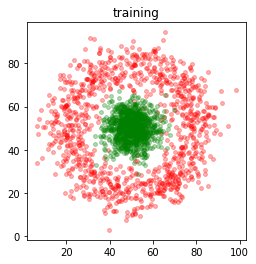

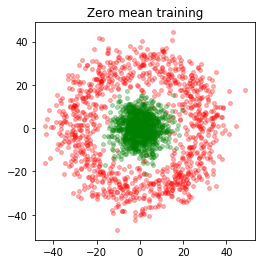

In [2]:
import matplotlib.pyplot as plt
from Week08_Week08_pycode_make_data import make_data


n = 1000
example_nr = 2
noise = 1.2

X, T, x, dim = make_data(example_nr, n, noise)
fig, ax = plt.subplots(1,1)
ax.scatter(X[0:n,0],X[0:n,1],c = 'red', alpha = 0.3, s = 15)
ax.scatter(X[n:2*n,0],X[n:2*n,1],c = 'green', alpha = 0.3, s = 15)
ax.set_aspect('equal', 'box')
plt.title('training')
fig.show



#%% Before training, you should make data have zero mean

c = np.mean(X)
x_c = x - c
X_c = X - c

fig, ax = plt.subplots(1,1)
ax.scatter(X_c[0:n,0],X_c[0:n,1],c = 'red', alpha = 0.3, s = 15)
ax.scatter(X_c[n:2*n,0],X_c[n:2*n,1],c = 'green', alpha = 0.3, s = 15)
ax.set_aspect('equal', 'box')
plt.title('Zero mean training')
fig.show

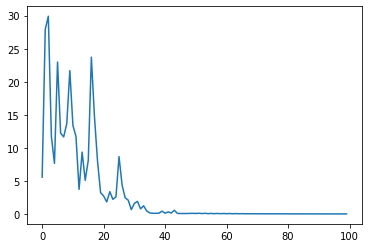

In [3]:
layers = [Linear(2, 32), ReLu(), Linear(32, 2), SoftMax()]

model = Model(layers)
loss = CrossEntropy()
optimizer = Optimizer(model, loss, lr=0.1)

loss_hist = list()
for i in range(100):
    loss_hist.append(optimizer.step(X_c, T))
    
plt.plot(loss_hist)

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

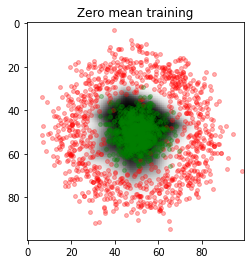

In [4]:
pred = np.zeros((x.max()+1, x.max()+1))
pred[x[:, 0], x[:, 1]] = model.forward(x_c)[:, 0]

fig, ax = plt.subplots(1,1)
ax.imshow(pred, cmap='gray')
ax.scatter(X[0:n,0],X[0:n,1],c = 'red', alpha = 0.3, s = 15)
ax.scatter(X[n:2*n,0],X[n:2*n,1],c = 'green', alpha = 0.3, s = 15)
ax.set_aspect('equal', 'box')
plt.title('Zero mean training')
fig.show

In [17]:
layers = [Linear(1, 2), ReLu(), Linear(2, 2), SoftMax()]
model = Model(layers)
model.layers[0].w = np.array([[0.1, -0.01]])
model.layers[0].b = np.array([[0., 10.]])

model.layers[2].w = np.array([[0.2,  0.],
                              [-0.01, 0.05]])
model.layers[2].b = np.array([[0., 4.]])

class Optimizer:
    def __init__(self, model, loss, lr=0.1):
        self.model = model
        self.loss = loss
        self.lr = lr
        
    def step(self, x, y):
        activations = [x.copy()]
        # Forward
        for layer in self.model.layers:
            activations.append(layer.forward(activations[-1]))
        print(activations)
        print(self.loss.forward(y, activations[-1]))
        # Backward
        dx = self.loss.backward(y, activations[-1])
        for i, layer in enumerate(self.model.layers[::-1]):
            dx, dws = layer.backward(activations[-2-i], dx)
            for param, dw in zip(layer.params, dws):
                print(param, dw)
                param += -self.lr*dw
        return self.loss.forward(y, activations[-1])

optimizer = Optimizer(model, loss, lr=0.1)
optimizer.step(np.array([[120]]), np.array([[0, 1]]))


[array([[120]]), array([[12. ,  8.8]]), array([[12. ,  8.8]]), array([[2.312, 4.44 ]]), array([[0.10640501, 0.89359499]])]
0.1125026355372013
[[ 0.2   0.  ]
 [-0.01  0.05]] [[ 1.2768601  -1.2768601 ]
 [ 0.93636407 -0.93636407]]
[[0. 4.]] [[ 0.10640501 -0.10640501]]
[[ 0.1  -0.01]] [[ 2.55372019 -0.76611606]]
[[ 0. 10.]] [[ 0.021281  -0.0063843]]


0.1125026355372013